In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.vector import CoordSys3D

In [2]:
def mod(vector):
    tamanho = sp.simplify(sp.sqrt(sp.vector.dot(vector,vector)))
    return tamanho

def lamb(var,vec):
    x = sp.lambdify(var, vec.dot(C.i), 'numpy')
    y = sp.lambdify(var, vec.dot(C.j), 'numpy')
    z = sp.lambdify(var, vec.dot(C.k), 'numpy')
    return [x,y,z]

In [3]:
C = CoordSys3D('C')
t = sp.symbols('t')

r = sp.sin(t)*C.i+sp.cos(t)*C.j+t*C.k
r_1 = sp.diff(r,t)

T = r_1/mod(r_1)
T_1 = sp.diff(T,t)

N = T_1/mod(T_1)
B = sp.vector.cross(T,N)

In [4]:
print('\n\nFunção r(t):')
display(sp.simplify(r))

print('\n\nFunção dr/dt:')
display(sp.simplify(r_1))

print('\n\nVetor unitário tangente da função r(t):')
display(sp.simplify(T))

print('\n\nVetor unitário normal da função r(t):')
display(sp.simplify(N))

print('\n\nVetor unitário binormal da função r(t):')
display(sp.simplify(B))



Função r(t):


(sin(t))*C.i + (cos(t))*C.j + t*C.k



Função dr/dt:


(cos(t))*C.i + (-sin(t))*C.j + C.k



Vetor unitário tangente da função r(t):


(sqrt(2)*cos(t)/2)*C.i + (-sqrt(2)*sin(t)/2)*C.j + (sqrt(2)/2)*C.k



Vetor unitário normal da função r(t):


(-sin(t))*C.i + (-cos(t))*C.j



Vetor unitário binormal da função r(t):


(sqrt(2)*cos(t)/2)*C.i + (-sqrt(2)*sin(t)/2)*C.j + (-sqrt(2)/2)*C.k

In [5]:
rx, ry, rz = lamb(t,r)
Tx, Ty, Tz = lamb(t,T)
Nx, Ny, Nz = lamb(t,N)
Bx, By, Bz = lamb(t,B)

In [6]:
n = 100
t_vals = np.linspace(0, 4*np.pi, n)

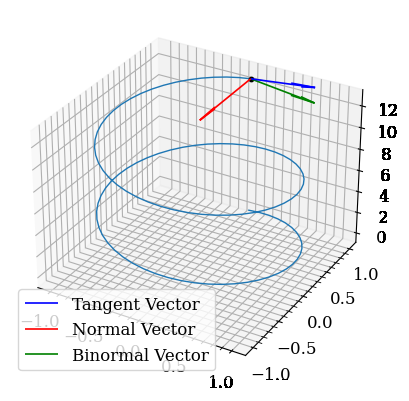

In [7]:
for i_,n_ in zip(t_vals,np.linspace(0,n,n)):
    ax = plt.axes(projection='3d')
    ax.plot(rx(t_vals),ry(t_vals),rz(t_vals),linewidth=1)
    ax.scatter(rx(i_),ry(i_),rz(i_),c='black',s=10)
    ax.quiver(rx(i_),ry(i_),rz(i_),Tx(i_),Ty(i_),Tz(i_),color='blue',linewidth=1.2,label='Tangent Vector')
    ax.quiver(rx(i_),ry(i_),rz(i_),Nx(i_),Ny(i_),Nz(i_),color='red',linewidth=1.2,label='Normal Vector')
    ax.quiver(rx(i_),ry(i_),rz(i_),Bx(i_),By(i_),Bz(i_),color='green',linewidth=1.2, label='Binormal Vector')
    plt.legend()
    plt.savefig(str(n_)+'.png')
plt.show()